# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_list = []
Temperature_list = []
Humidity_list = []
Cloudiness_list = []
WindSpeed_list = []
Latitude_list = []

In [8]:
#https://openweathermap.org/current - always refer to documentation when using APIs
#parameters used are: q for city, units for temperature unit, appid for api_key, 
api_key = "8c0f4bdd86374856ad0d8e8eff9a2a08"
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
for n in range(0,len(cities)):
    
    city = cities[n]
#     print(city)
    unitsc = "metric"
    unitsf = "imperial"
    try:
        # Build query URL and request your results in Celsius
        parameters = {"appid" : api_key, "q" : city, "units" : unitsf}
        weather_response = requests.get(url,params = parameters)
        weather_json_F = weather_response.json()
        # print(weather_json_F)
        print("Processing Record {} | {}".format(n,city))
        lat = weather_json_F['coord']['lat']
        temp_f = weather_json_F['main']['temp']
        humidity = weather_json_F['main']['humidity']
        wind_speed = weather_json_F['wind']['speed']
        cloudiness = weather_json_F['clouds']['all']
        
        city_list.append(city)
        Temperature_list.append(temp_f)
        Humidity_list.append(humidity)
        Cloudiness_list.append(cloudiness)
        WindSpeed_list.append(wind_speed)
        Latitude_list.append(lat)
        
        
        # sleep for 30 seconds
#         time.sleep(30)
    except:
        print("City not found. Skipping ...")

Processing Record 0 | saleaula
City not found. Skipping ...
Processing Record 1 | nome
Processing Record 2 | illoqqortoormiut
City not found. Skipping ...
Processing Record 3 | grenaa
Processing Record 4 | kirs
Processing Record 5 | namatanai
Processing Record 6 | rikitea
Processing Record 7 | tenenkou
Processing Record 8 | ushuaia
Processing Record 9 | dikson
Processing Record 10 | saskylakh
Processing Record 11 | okahandja
Processing Record 12 | punta arenas
Processing Record 13 | mahebourg
Processing Record 14 | albany
Processing Record 15 | itaueira
Processing Record 16 | mukhtolovo
Processing Record 17 | puerto ayora
Processing Record 18 | tuatapere
Processing Record 19 | phek
Processing Record 20 | torbay
Processing Record 21 | castro
Processing Record 22 | port alfred
Processing Record 23 | darhan
Processing Record 24 | taksimo
Processing Record 25 | labrea
City not found. Skipping ...
Processing Record 26 | mataura
Processing Record 27 | severnyy
City not found. Skipping ...
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert to dataframe
main_table = pd.DataFrame({"City":city_list,"Latitude":Latitude_list,"Temperature(F)":Temperature_list,"Humidity(%)":Humidity_list,"Cloudiness(%)":Cloudiness_list,
             "Wind Speed(mph)": WindSpeed_list})

In [11]:
main_table.head()

,City,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,nome,30.04,71.28,83,90,6.76
1,grenaa,56.42,43.39,75,80,4.70
2,kirs,59.34,17.00,64,0,2.73
3,namatanai,-3.66,82.88,100,32,3.85
4,rikitea,-23.12,77.48,100,48,14.81


In [15]:
main_table.count()

City               554
Latitude           554
Temperature(F)     554
Humidity(%)        554
Cloudiness(%)      554
Wind Speed(mph)    554
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

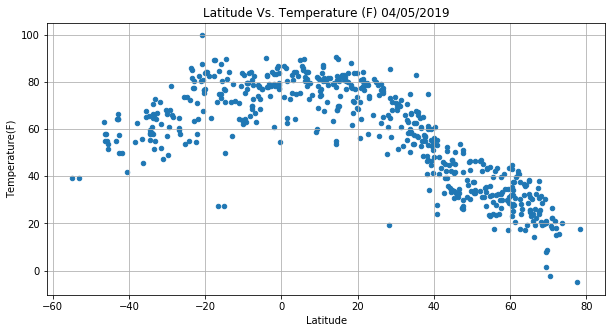

In [36]:
# Extract temperature and latitude columns from main table
temp_table = main_table[["Latitude","Temperature(F)"]]
#generate scatter plot
temp_table.plot(kind="scatter",x="Latitude",y="Temperature(F)",grid=True, figsize=(10,5),title = "Latitude Vs. Temperature (F) 04/05/2019")
plt.show()

#### Latitude vs. Humidity Plot

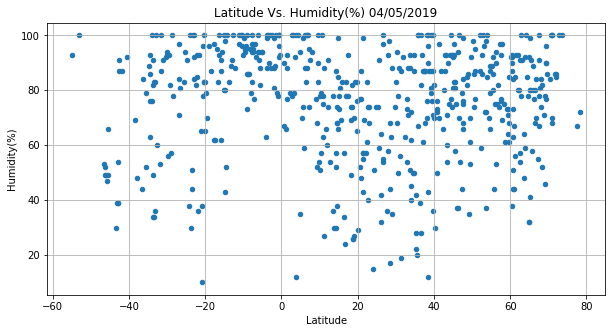

In [35]:
# Extract humidity and latitude columns from main table
Humidity_table = main_table[["Latitude","Humidity(%)"]]
#generate scatter plot
Humidity_table.plot(kind="scatter",x="Latitude",y="Humidity(%)",grid=True, figsize=(10,5),title = "Latitude Vs. Humidity(%) 04/05/2019")
plt.show()

#### Latitude vs. Cloudiness Plot

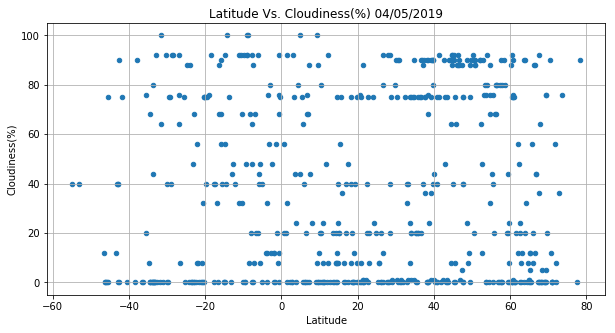

In [34]:
# Extract cloudiness and latitude columns from main table
Cloudiness_table = main_table[["Latitude","Cloudiness(%)"]]
#generate scatter plot
Cloudiness_table.plot(kind="scatter",x="Latitude",y="Cloudiness(%)",grid=True, figsize=(10,5),title = "Latitude Vs. Cloudiness(%) 04/05/2019")
plt.show()

#### Latitude vs. Wind Speed Plot

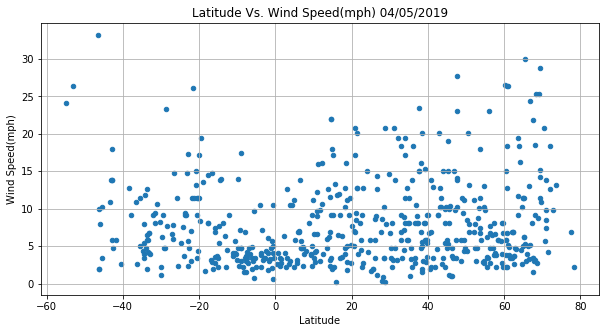

In [33]:
# Extract wind speed and latitude columns from main table
WindSpeed_table = main_table[["Latitude","Wind Speed(mph)"]]
#generate scatter plot
WindSpeed_table.plot(kind="scatter",x="Latitude",y="Wind Speed(mph)",grid=True, figsize=(10,5),title = "Latitude Vs. Wind Speed(mph) 04/05/2019")
plt.show()